In [21]:
import time
import collections

import numpy as np

import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 10
plt.rcParams[  "font.size"   ] = 20

In [23]:
def empty_sudoku():
    sdk = [[0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0],
          
           [0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0],

           [0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0],
           [0, 0, 0,   0, 0, 0,   0, 0, 0]]
    return np.array(sdk)

def easy_sudoku():
    sdk = [[0, 0, 4,   0, 0, 0,   0, 6, 7],
           [3, 0, 0,   4, 7, 0,   0, 0, 5],
           [1, 5, 0,   8, 2, 0,   0, 0, 3],
           
           [0, 0, 6,   0, 0, 0,   0, 3, 1],
           [8, 0, 2,   1, 0, 5,   6, 0, 4],
           [4, 1, 0,   0, 0, 0,   9, 0, 0],
           
           [7, 0, 0,   0, 8, 0,   0, 4, 6],
           [6, 0, 0,   0, 1, 2,   0, 0, 0],
           [9, 3, 0,   0, 0, 0,   7, 1, 0]]
    return np.array(sdk)

def normal_sudoku():
    sdk = [[0, 0, 0,   0, 0, 7,   0, 0, 5],
           [0, 7, 0,   0, 8, 6,   0, 3, 2],
           [0, 0, 0,   3, 0, 0,   1, 0, 7],
          
           [4, 0, 0,   0, 0, 8,   0, 0, 0],
           [0, 0, 0,   6, 4, 5,   7, 8, 0],
           [8, 0, 0,   0, 7, 0,   0, 0, 0],

           [0, 1, 8,   0, 0, 3,   4, 2, 0],
           [2, 4, 0,   0, 6, 0,   5, 0, 9],
           [0, 0, 6,   7, 0, 0,   0, 0, 0]]
    return np.array(sdk)

In [35]:
all_numbers = set(range(1, 10))

def possibilities(sdk, i, j):
    square_i = i // 3
    square_j = j // 3
    
    si = slice(square_i * 3, square_i * 3 + 3)
    sj = slice(square_j * 3, square_j * 3 + 3)
    
    possibilities  = set(all_numbers)
    possibilities -= set(sdk[ i,  :])
    possibilities -= set(sdk[ :,   j])
    possibilities -= set(sdk[si, sj].ravel())
    
    return possibilities

def invert_dict(d):
    numbers = collections.default_dict(list)
    for cell, ps in d.items():
        for number in ps:
            numbers[number].append(cell)
    return numbers

def get_possibilities(sdk):
    p_all  = dict()
    p_sqs  = collections.defaultdict(lambda: collections.default_dict( set))
    p_rows = collections.defaultdict(lambda: collections.default_dict(list))
    p_cols = collections.defaultdict(lambda: collections.default_dict(list))
    for i in range(9):
        for j in range(9):
            if sdk[i, j] != 0: continue

            si = i // 3
            sj = j // 3

            p = possibilities(sdk, i, j)
            p_all [ i,  j] =      p
            p_sqs [si, sj].union (p)
            p_rows[ i][ j].extend(p)
            p_cols[ j][ i].extend(p)

    return p_all, p_sqs, p_rows, p_cols

def count_unique(d):
    unique = []
    which  = []
    for u in set(d.values()):
        keys, match = zip(*(u == v for v in d.values()))
        which .append(keys)
        unique.append(u)
        counts.append(sum())
    return unique, counts

def solve(sdk):
    while 0 in sdk.ravel():
        modified = False
        
        p_all, p_sqs, p_rows, p_cols = get_possibilities(sdk)
        
        for (i, j), ps in p_all.items():
            if len(ps) > 1: continue
            
            modified = True
            sdk[i, j] = next(iter(ps))
            yield ((i, j),)

        for row in range(9):
            p_n = invert_dict(p_rows[row])
            blocked = []
            for n, jns in sorted(p_n.items()):
                for m, jms in sorted(p_n.items()):
                    if m <= n: continue
                    
                    jns = set(jns)
                    jms = set(jms)
                    if jns.intersection(jms) == jns == jms:
                        blocked.extend(jns)

            if not blocked: continue
                
            for n, jns in sorted(p_n.items()):

        if not modified:
            print("WARNING: Can't solve this sudoku")
            break

        continue
        
        for i, ps in p_rows.items():
            if len(ps) == 1:
                j, (p,) = next(iter(ps.items()))
                sdk[i, j] = p
                modified  = True
            else:
                free = {}
                all_values = tuple(v for p in ps.values() for v in p)
                values, counts = count_repeats(all_values)
                for value, repeats in it.groupby(sorted(all_values)):
                    if len(repeats) > 1:
                        free[value] = tuple(key for key, pjs in ps.items() if value in pjs)
                        
        if not modified:
            print("WARNING: Can't solve this sudoku")
            break

def check_sudoku(sdk):
    for row in sdk:
        assert set(row) == all_numbers
    for col in sdk.T:
        assert set(col) == all_numbers
    for squares in np.split(sdk, 3, axis=0):
        for square in np.split(squares, 3, axis=1):
            assert set(square.ravel()) == all_numbers
    print("Sudoku solved correctly")

In [36]:
def display_grid():
    xyrange = np.array([0, 9]) - 0.5

    for i in range(10):
        for j in range(10):
            yrange = np.array([j, j]) - 0.5
            plt.plot(xyrange, yrange, "k-", lw=1 + 3 * int(j % 3 == 0))

        xrange = np.array([i, i]) - 0.5
        plt.plot(xrange, xyrange, "k", lw=1 + 3 * int(i % 3 == 0))

    plt.axis("off")

def display_sudoku(sdk, updates=()):
    for i in range(9):
        for j in range(9):
            v = sdk[i, j]
            if v:
                color = "r" if (i, j) in updates else "k"
                plt.text(i, j, str(v), color=color, ha="center", va="center")

Sudoku solved correctly


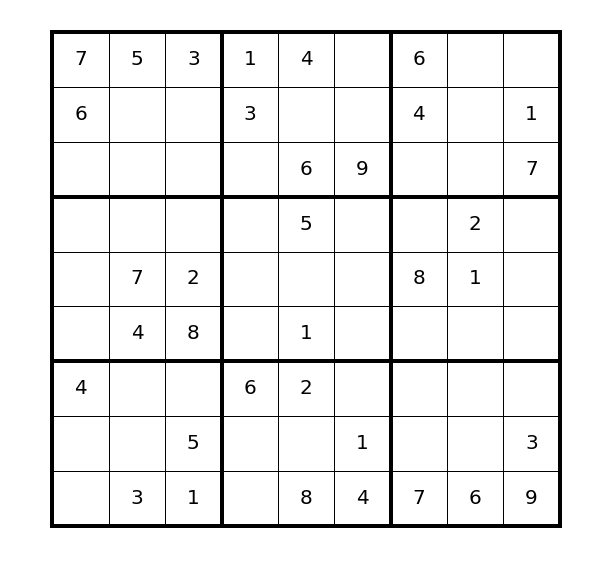

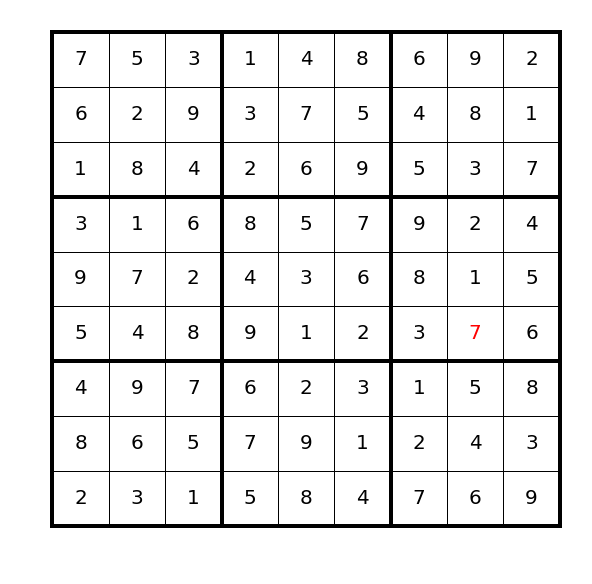

In [37]:
sdk = easy_sudoku()
display_grid()
display_sudoku(sdk)
t0 = time.time()
try:
    for updates in solve(sdk):
        t1 = time.time()
        t0 = t1
except Exception as e:
    print(e)
    pass

plt.figure()
display_grid()
display_sudoku(sdk, updates)
check_sudoku(sdk)

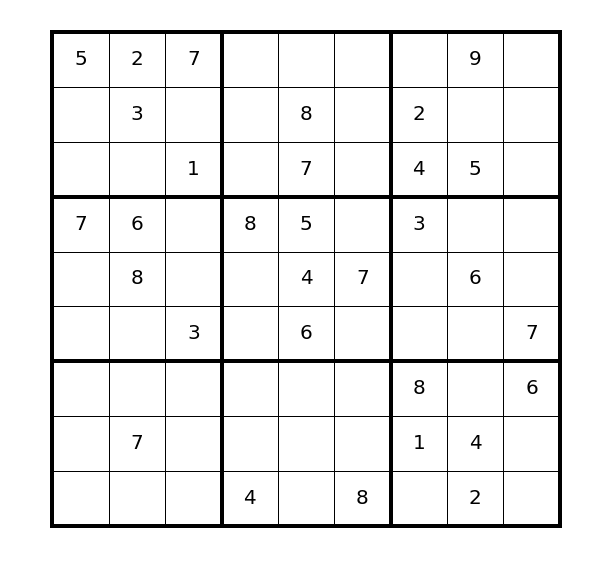

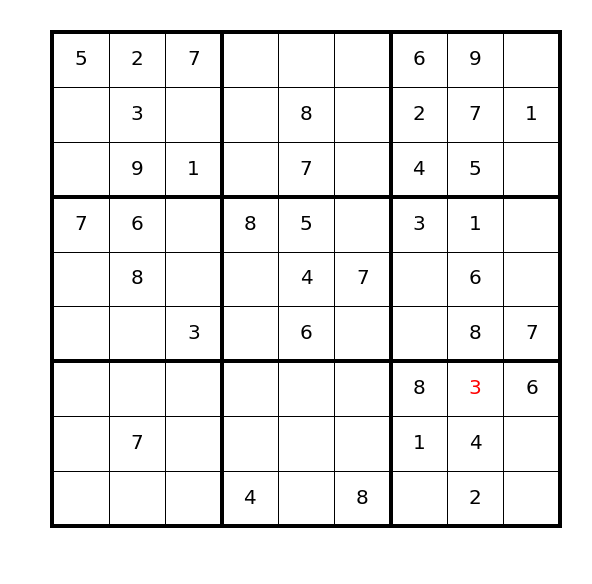

In [38]:
sdk = normal_sudoku()
display_grid()
display_sudoku(sdk)
t0 = time.time()
try:
    for updates in solve(sdk):
        t1 = time.time()
        t0 = t1
except Exception as e:
    print(e)
    pass

plt.figure()
display_grid()
display_sudoku(sdk, updates)